In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental/Social Media Usage - Test.xlsm
/kaggle/input/mental/Social Media Usage - Test_updated.xlsm
/kaggle/input/mental/Sleep Dataset.xlsm
/kaggle/input/mental/Social Media Usage - Train.xlsm
/kaggle/input/mental/Social Media Usage - Val.xlsm
/kaggle/input/mental/Social Media Usage - Val_updated.xlsm
/kaggle/input/mental/updated_social_media_usage_train.xlsm


In [2]:
df = pd.read_excel("/kaggle/input/mental/updated_social_media_usage_train.xlsm")
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,998.0,35.0,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,999.0,28.0,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


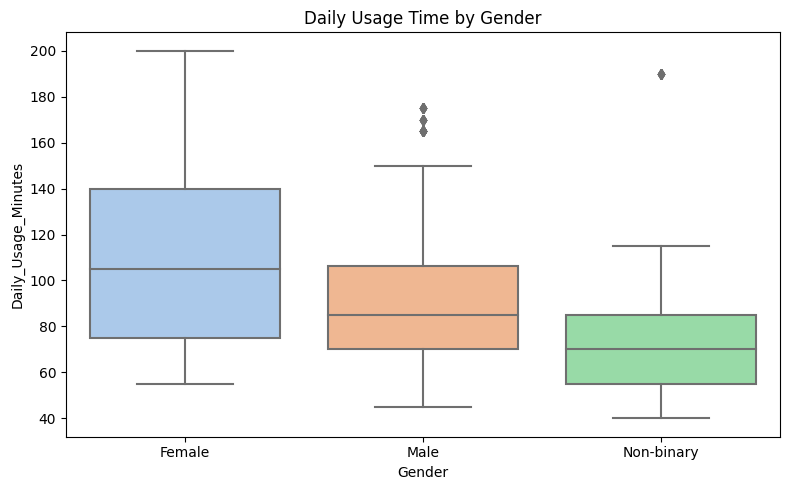

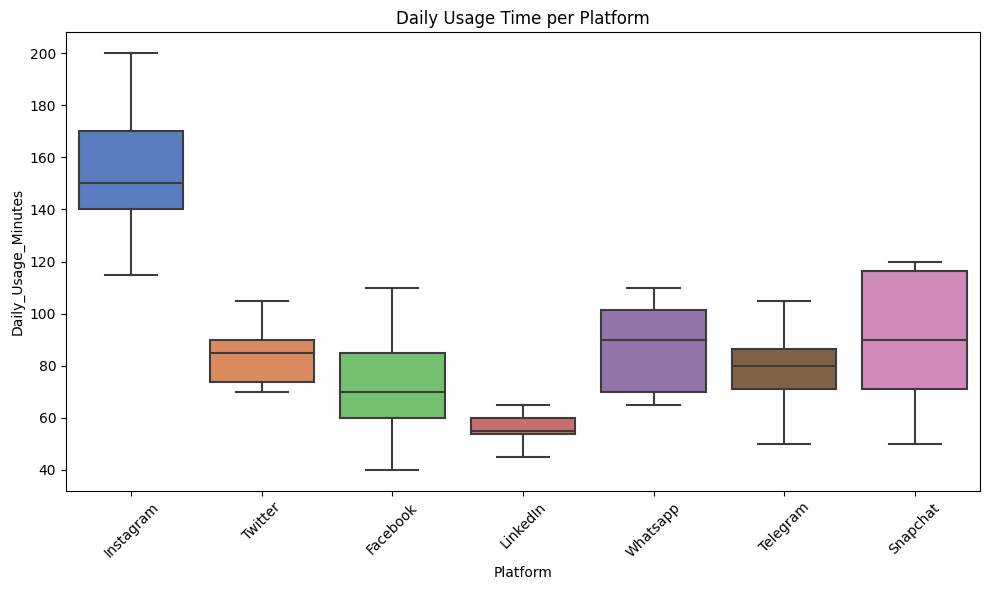

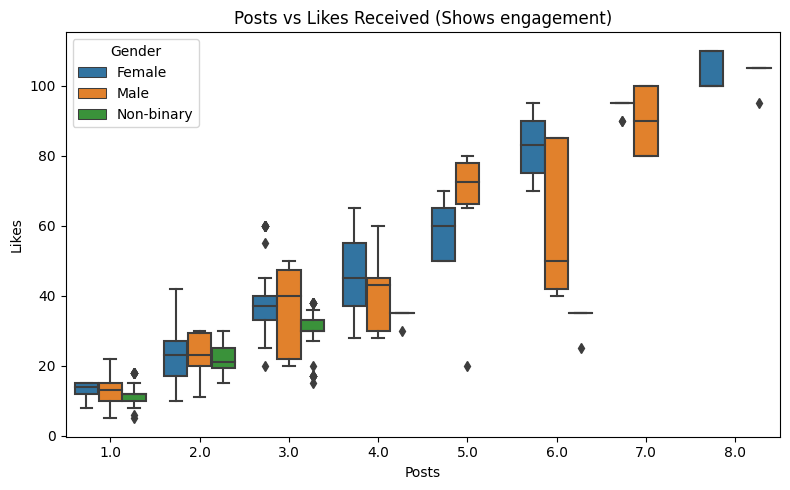

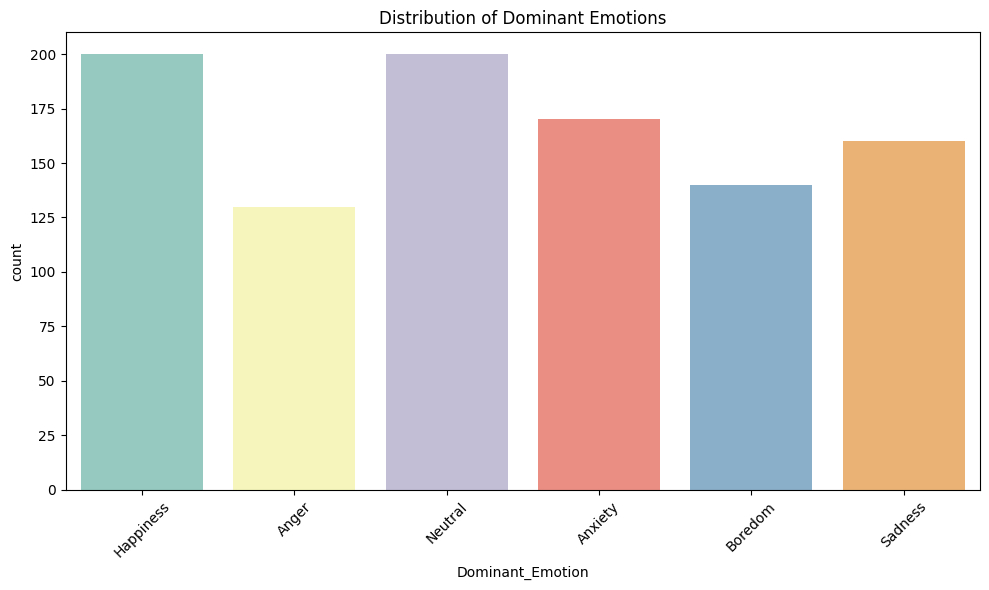

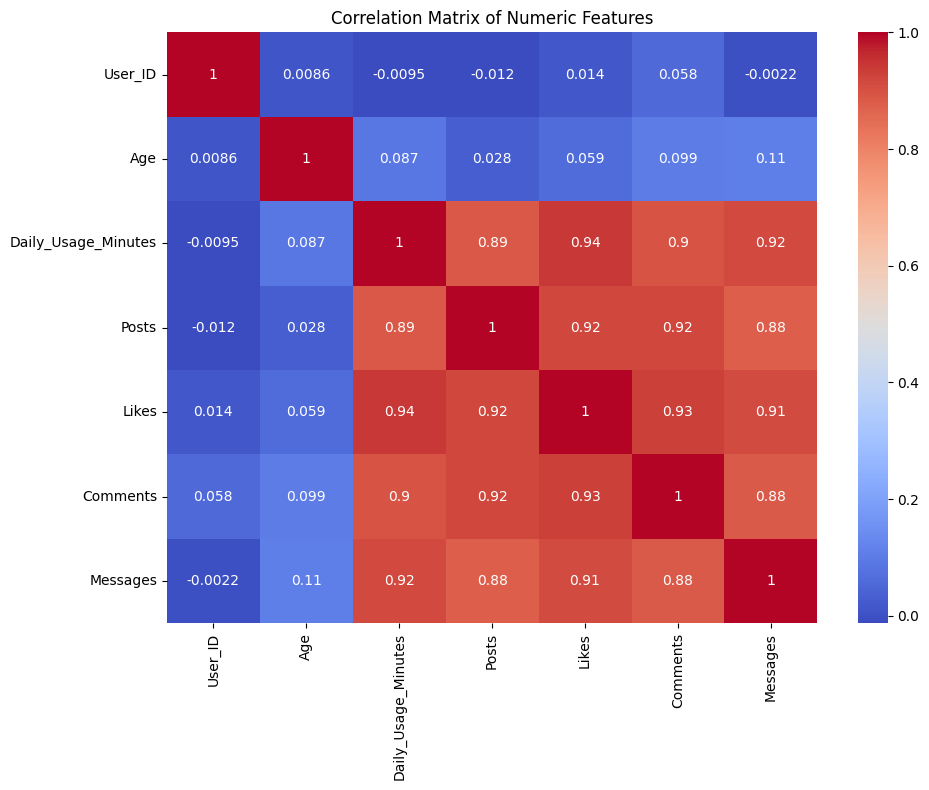

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# Basic info
# print("Dataset Overview:")
# print(df.head())
# print(df.info())
# print(df.describe())

# Rename columns for easier access (optional)
df.rename(columns={
    'Daily_Usage_Time (minutes)': 'Daily_Usage_Minutes',
    'Likes_Received_Per_Day': 'Likes',
    'Comments_Received_Per_Day': 'Comments',
    'Messages_Sent_Per_Day': 'Messages',
    'Posts_Per_Day': 'Posts'
}, inplace=True)

# # Plot: Age distribution
# plt.figure(figsize=(8, 5))
# sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
# plt.title("Age Distribution of Users")
# plt.xlabel("Age")
# plt.ylabel("Count")
# plt.tight_layout()
# plt.show()

# Plot: Daily Usage Time by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Daily_Usage_Minutes', data=df, palette='pastel')
plt.title("Daily Usage Time by Gender")
plt.tight_layout()
plt.show()

# Plot: Platform vs Daily Usage Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform', y='Daily_Usage_Minutes', data=df, palette='muted')
plt.title("Daily Usage Time per Platform")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Posts vs Likes (Engagement)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Posts', y='Likes', hue='Gender', data=df)
plt.title("Posts vs Likes Received (Shows engagement)")
plt.tight_layout()
plt.show()

# Plot: Emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=df, palette='Set3')
plt.title("Distribution of Dominant Emotions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap (only numeric features)
plt.figure(figsize=(10, 8))
numeric_features = df.select_dtypes(include=['number'])
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# # Additional: Platform vs Emotion
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Platform', hue='Dominant_Emotion', data=df, palette='Set2')
# plt.title("Platform vs Dominant Emotion")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


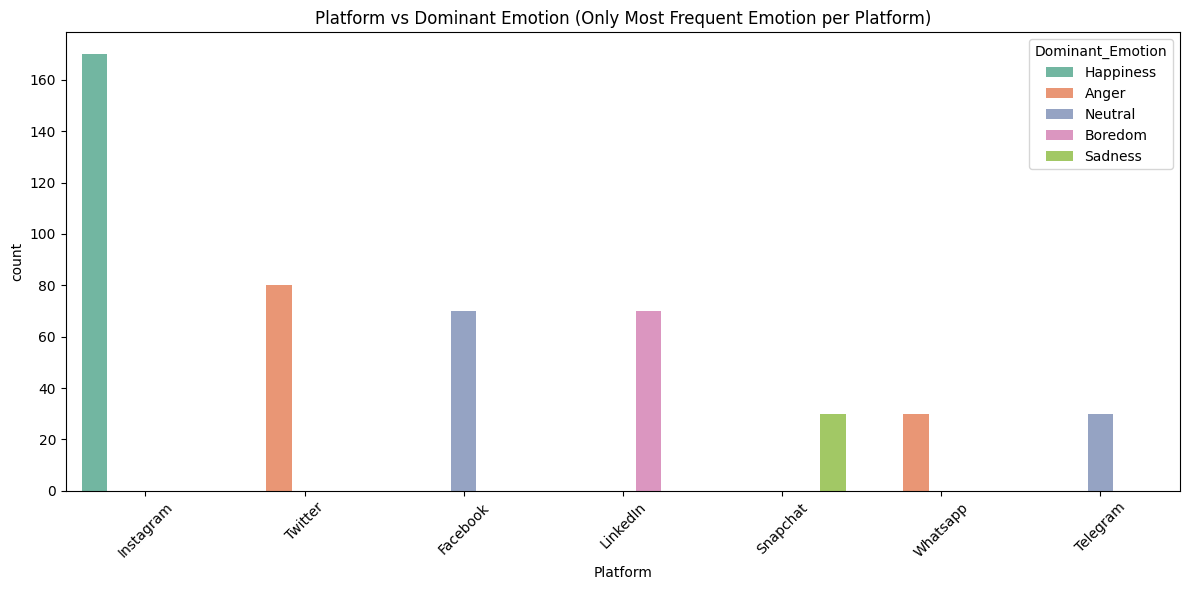

In [4]:
dominant_emotion_per_platform = df.groupby('Platform')['Dominant_Emotion'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Merge with original dataset to filter only dominant emotions
filtered_df = df.merge(dominant_emotion_per_platform, on=['Platform', 'Dominant_Emotion'])

# Plot the filtered data
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Dominant_Emotion', data=filtered_df, palette='Set2')

plt.title("Platform vs Dominant Emotion (Only Most Frequent Emotion per Platform)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

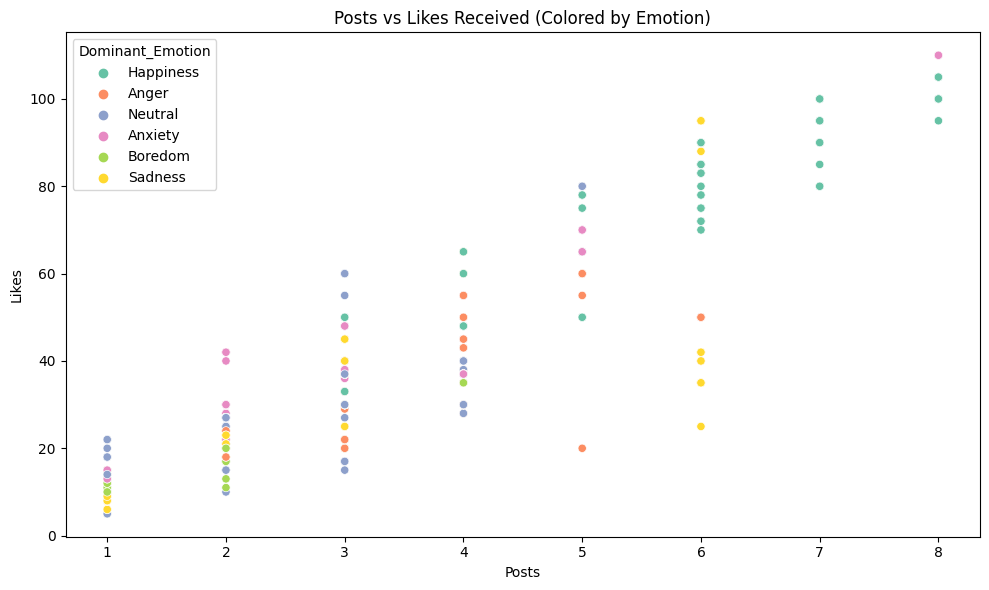

In [5]:
# Scatter plot: Posts vs Likes vs Emotion (Hue)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Posts', y='Likes', hue='Dominant_Emotion', data=df, palette='Set2')
plt.title("Posts vs Likes Received (Colored by Emotion)")
plt.tight_layout()
plt.show()

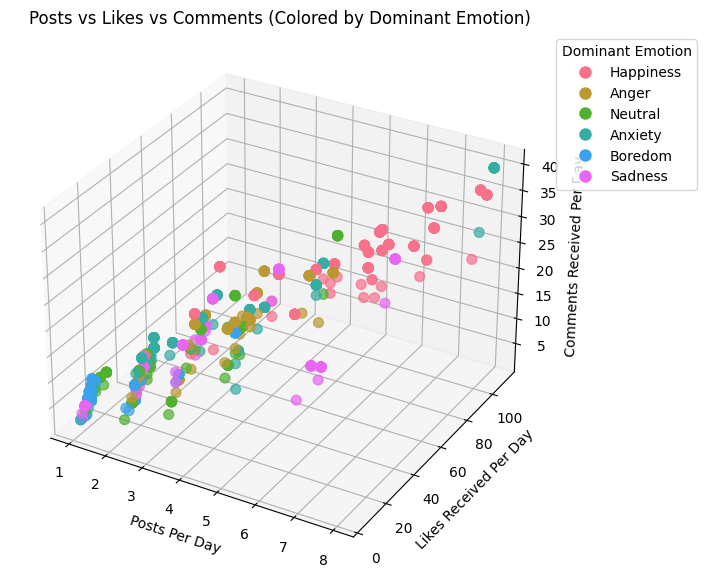

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Ensure there are no NaN values in the 'Dominant_Emotion' column
df = df.dropna(subset=['Dominant_Emotion'])

# Get unique emotions
unique_emotions = df['Dominant_Emotion'].dropna().unique()

# Generate color palette based on the number of unique emotions
emotion_palette = sns.color_palette("husl", n_colors=len(unique_emotions))

# Map each unique emotion to a color
emotion_mapping = {emotion: emotion_palette[i] for i, emotion in enumerate(unique_emotions)}
colors = df['Dominant_Emotion'].map(emotion_mapping)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['Posts'], df['Likes'], df['Comments'], 
                     c=colors, s=50, alpha=0.7)

# Labels and Title
ax.set_xlabel("Posts Per Day")
ax.set_ylabel("Likes Received Per Day")
ax.set_zlabel("Comments Received Per Day")
ax.set_title("Posts vs Likes vs Comments (Colored by Dominant Emotion)")

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) 
           for color in emotion_palette]
ax.legend(handles, unique_emotions, title="Dominant Emotion", loc="upper left", bbox_to_anchor=(1,1))

plt.show()

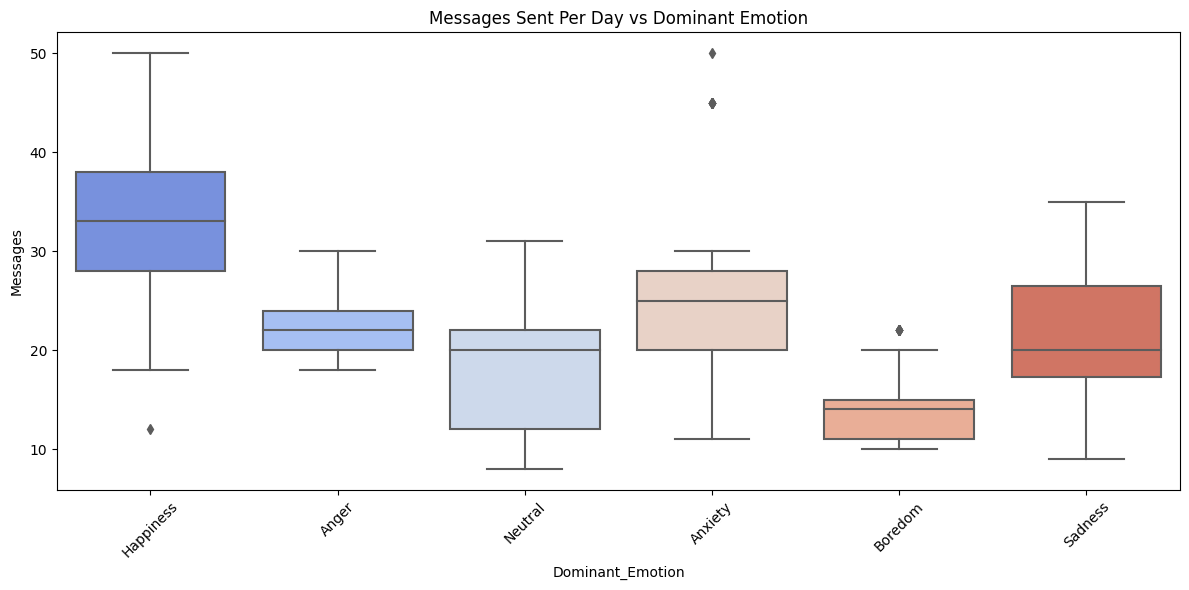

In [7]:
# Box plot: Messages Sent Per Day vs. Dominant Emotion
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dominant_Emotion', y='Messages', data=df, palette='coolwarm')
plt.title("Messages Sent Per Day vs Dominant Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

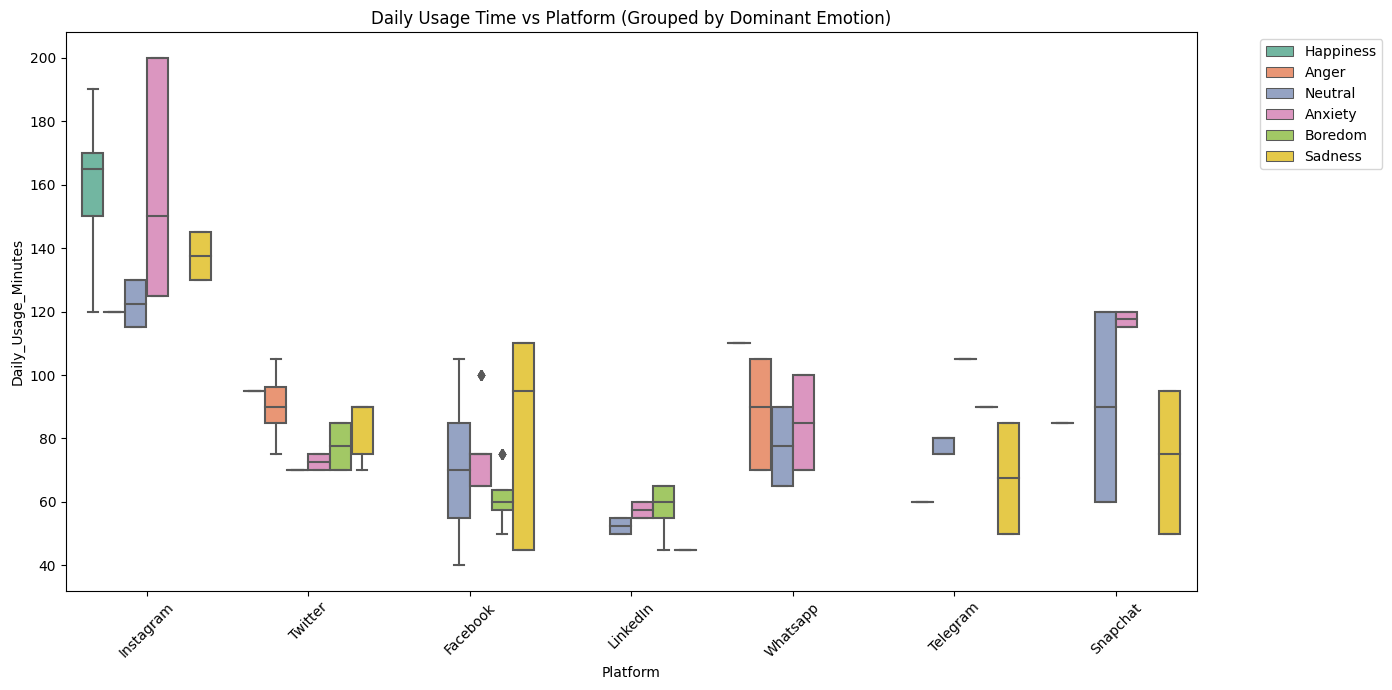

In [8]:
# Box plot: Daily Usage Time by Platform and Dominant Emotion
plt.figure(figsize=(14, 7))
sns.boxplot(x='Platform', y='Daily_Usage_Minutes', hue='Dominant_Emotion', data=df, palette='Set2')
plt.title("Daily Usage Time vs Platform (Grouped by Dominant Emotion)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()